# Projet HPC calcul parallèle MACS3

---

Davidson Lova RAZAFINDRAKOTO, ING3 MACS

---

In [1]:
import numpy as np
import pylab as plt

## $(\mathcal{O})$ Programme séquentiel

On ressence ici les données initiales du programme séquentiel qu'on va reprendre dans tout les autres versions

```C++
  int dim[2]; dim[0] = 500; dim[1] = 500;
  int nfic     = 2;
```

```C++
  const double dt = 0.005;  // pas de temps
  double U[2];
  U[0] = 1.;      // vitesse advection
  U[1] = 1.;
 
  const double mu = 0.0005;   // coeff diffusion
  int Nitmax      = 2000;
  int Stepmax     = 2;

```


In [2]:
# Build it the sequential
!make advectiondiff.exe

mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -c Advection_diffusion_seq.cpp
mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -o advectiondiff.exe Advection_diffusion_seq.o   -lm -lrt  -lmpi 


Création du `resRef.txt`

In [3]:
!./advectiondiff.exe
!./postresultat Sortie.txt
!cp res.txt resRef.txt

Sortie.txt


In [4]:
# Verifier si la copie est bonne 
!python3 verif_calcul.py

The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
0.0


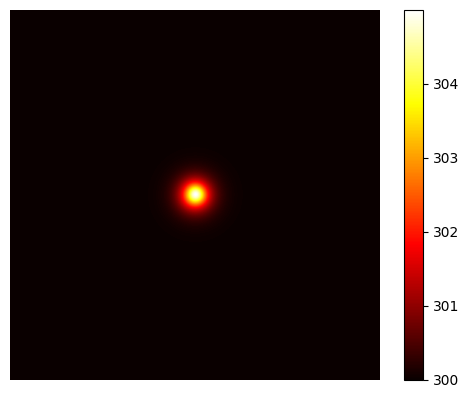

In [5]:
#Afficher le resultat
res = np.loadtxt('res.txt',dtype="float64")
y = res[:,2]
l = int(np.sqrt(len(y)))
y_grid = y.reshape((l,l))
import pylab as plt
plt.imshow(y_grid, cmap="hot")
plt.axis(False)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [6]:
#clean it all up
!make clean

## $(\mathcal{A})$ OpenMP "fine grain"

In [7]:
# In the beginning
# !cp Advection_diffusion_seq.cpp Advection_diffusion_omp.cpp

In [8]:
!make advectiondiff_omp.exe

mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -c Advection_diffusion_omp.cpp
mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -o advectiondiff_omp.exe Advection_diffusion_omp.o   -lm -lrt  -lmpi 


In [9]:
!./advectiondiff_omp.exe
!./postresultat Sortie.txt

Sortie.txt


In [10]:
!python3 verif_calcul.py

The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
0.0


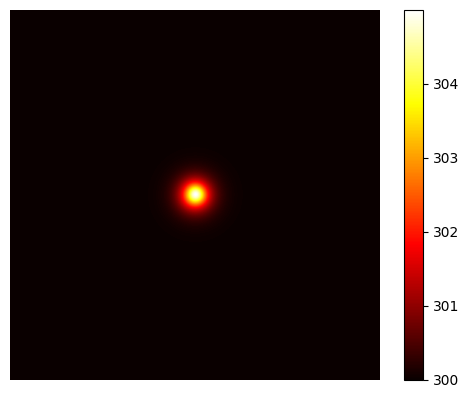

In [11]:
#Afficher le resultat
res = np.loadtxt('res.txt',dtype="float64")
y = res[:,2]
l = int(np.sqrt(len(y)))
y_grid = y.reshape((l,l))
import pylab as plt
plt.imshow(y_grid, cmap="hot")
plt.gca().invert_yaxis()
plt.axis(False)
plt.colorbar()
plt.show()

In [12]:
#clean it all up 
!make clean

## $(\mathcal{B})$ MPI version 1

In [13]:
# !cp Advection_diffusion_seq.cpp Advection_diffusion_mpi1.cpp

In [14]:
!make advectiondiff_mpiv1.exe

mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -c Advection_diffusion_mpiv1.cpp
mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -o advectiondiff_mpiv1.exe Advection_diffusion_mpiv1.o   -lm -lrt  -lmpi 


In [15]:
!mpiexec -np 3 advectiondiff_mpiv1.exe
!./postresultat Sortie*

Sortie00000.txt
Sortie00001.txt
Sortie00002.txt


In [16]:
!python3 verif_calcul.py

The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.800171574517355e-10


With 2 processes

```Python
The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.7772209220551967e-10
```

With 3 processes

```Python
The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.800171574517355e-10
```

With 4 processes

```Python
The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.791266912100173e-10
```

With 5 processes

```Python
The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.7860866150908977e-10
```


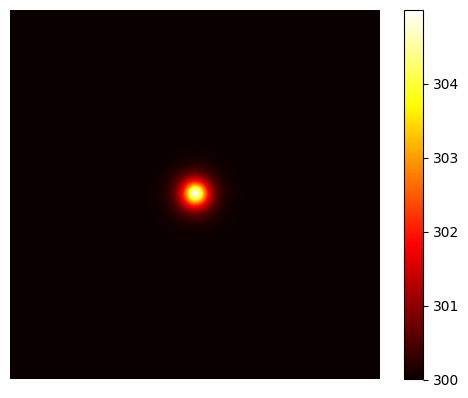

In [17]:
#Afficher le resultat
res = np.loadtxt('res.txt',dtype="float64")
y = res[:,2]
l = int(np.sqrt(len(y)))
y_grid = y.reshape((l,l))
import pylab as plt
plt.imshow(y_grid, cmap="hot")
plt.gca().invert_yaxis()
plt.axis(False)
plt.colorbar()
plt.show()

In [18]:
#clean it all up 
!make clean

## $(\mathcal{C})$ MPI version 2

In [19]:
# !cp Advection_diffusion_seq.cpp Advection_diffusion_mpiv2.cpp

In [20]:
!make advectiondiff_mpiv2.exe

mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -c Advection_diffusion_mpiv2.cpp
mpic++ -Wall -fPIC -O2 -mtune=native -fopenmp -o advectiondiff_mpiv2.exe Advection_diffusion_mpiv2.o   -lm -lrt  -lmpi 


In [21]:
!mpiexec -np 4 advectiondiff_mpiv2.exe

In [22]:
!./postresultat Sortie*

Sortie00000.txt
Sortie00001.txt
Sortie00002.txt
Sortie00003.txt


In [23]:
!python res_norm.py
!python verif_calcul.py

The loaded array shape is: (250000, 2) 0.01 300.0
Calcul // OK
1.7708692031387302e-10


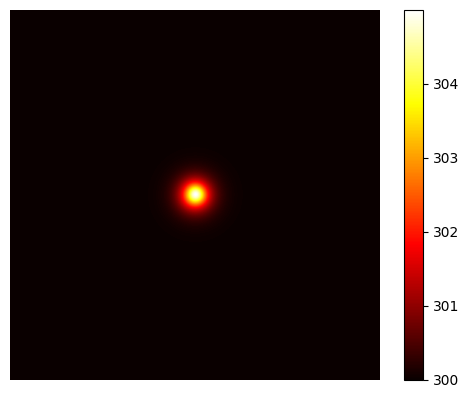

In [24]:
#Afficher le resultat
res = np.loadtxt('res.txt',dtype="float64")
y = res[:,2]
l = int(np.sqrt(len(y)))
y_grid = y.reshape((l,l))
import pylab as plt
plt.imshow(y_grid, cmap="hot")
plt.gca().invert_yaxis()
plt.axis(False)
plt.colorbar()
plt.show()

In [25]:
#clean it all up
!make clean